[Kaan Can Yılmaz'ın](https://www.udemy.com/user/kaan-can-yilmaz/)

* [Machine Learning ve Python: A'dan Z'ye Makine Öğrenmesi](https://www.udemy.com/machine-learning-ve-python-adan-zye-makine-ogrenmesi-4)

kursundan öğrendiklerimi denediğim ve derlediğim kernelimdir.

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading and Preprocessing Data

# Importing the training set
dataset_train = pd.read_csv('DOP/5a_40A.csv')
dataset_train.head()

,Hours,Temperature
0,0.0068,15.5483
1,0.0068,15.1557
2,0.0229,15.2865
3,0.0229,15.1557
4,0.0389,15.1557


In [7]:
train = dataset_train.loc[:, ["Hours"]].values
train

array([[0.0068],
       [0.0068],
       [0.0229],
       ...,
       [5.2268],
       [5.2268],
       [5.2268]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.        ],
       [0.        ],
       [0.00308429],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [15]:
train_scaled[0:100]

array([[0.        ],
       [0.        ],
       [0.00308429],
       [0.00308429],
       [0.00614943],
       [0.03691571],
       [0.04614943],
       [0.04923372],
       [0.06461686],
       [0.06770115],
       [0.08      ],
       [0.08308429],
       [0.08308429],
       [0.08308429],
       [0.08308429],
       [0.08308429],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08614943],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.08923372],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.09231801],
       [0.092

In [13]:
train[0:100]

array([[0.0068],
       [0.0068],
       [0.0229],
       [0.0229],
       [0.0389],
       [0.1995],
       [0.2477],
       [0.2638],
       [0.3441],
       [0.3602],
       [0.4244],
       [0.4405],
       [0.4405],
       [0.4405],
       [0.4405],
       [0.4405],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4565],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4726],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.4887],
       [0.5047],
       [0.5047],
       [0.5047],
       [0.5047],
       [0.5047],
       [0.5208],
       [0.5208],
       [0.5208],
       [0.5208],
       [0.5208

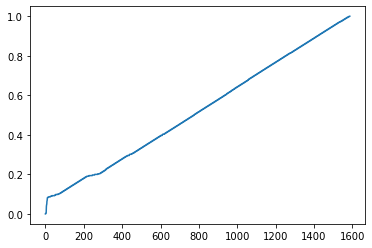

In [20]:
plt.plot(train_scaled)
plt.show()

In [21]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train[0:1]

array([[[0.        ],
        [0.        ],
        [0.00308429],
        [0.00308429],
        [0.00614943],
        [0.03691571],
        [0.04614943],
        [0.04923372],
        [0.06461686],
        [0.06770115],
        [0.08      ],
        [0.08308429],
        [0.08308429],
        [0.08308429],
        [0.08308429],
        [0.08308429],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08614943],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.08923372],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0.09231801],
        [0

In [23]:
y_train[0:1]

array([0.09538314])

In [28]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

ModuleNotFoundError: No module named 'keras'

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('../input/google-stock-price/Stock_Price_Test.csv')
dataset_test.head()

In [ ]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
#inputs

In [ ]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**Long Short Term Memory (LSTMs)**

In [ ]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('../input/airline-passengers/international-airline-passengers.csv',skipfooter=5)
data.head()

In [ ]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [ ]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

In [ ]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

In [ ]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [ ]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()